In [149]:
import numpy as np
import matplotlib.pyplot as plt


In [126]:
def txt_to_numpy(filename):
    a_file = open(filename)
    file_contents = a_file.read()
    contents_split = file_contents.splitlines()
    array=[]
    for i in range(len(contents_split)):
        array.append( np.array([x for x in contents_split[i].split(',')]))
    return np.array(array).astype(float)

In [127]:
#read in training dataset and labels
training_set=txt_to_numpy("handwriting_training_set.txt")
training_labels=txt_to_numpy("handwriting_training_set_labels.txt")
#read in test dataset and labels
test_set=txt_to_numpy("handwriting_test_set.txt")
test_labels=txt_to_numpy("handwriting_test_set_labels.txt")

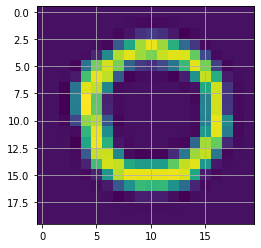

In [171]:

number=training_set[399]
number=np.reshape(number,(20,20)) 
plt.imshow(number.T, cmap=plt.get_cmap('viridis')) 
plt.grid();

In [201]:
training_digits=np.split(training_set,10)
print(np.shape(training_digits))
#initialize lists for storing the decompositions
L_singular_vectors=[]
Sigma_matrices=[]
R_singular_vectors=[]

#Compute the SVD for each digit and store the resulting matrices that form the decomposition in a new matrix 
for i in range(10):
    #compute svd for the digit  i 
    U,S,V = np.linalg.svd(training_digits[i],full_matrices=False)
    L_singular_vectors.append(U)
    Sigma_matrices.append(S)# use np.diag(S) for nxn matrix of singular values 
    R_singular_vectors.append(V)

#conver the lists to numpy arrays after storing all of the decompositions
Us=np.array(L_singular_vectors).astype(float)
Ss=np.array(Sigma_matrices).astype(float)
Vs=np.array(R_singular_vectors).astype(float)



(10, 400, 400)


In [205]:
#This structure allows us to use nested indicies to reference parts of the various svds computed
# For instance the first unitary vector for digit 0 is Us[0][1] etc,
"""
plt.imshow(Us[1], cmap='hot', interpolation='nearest')
plt.show()
plt.imshow(Ss[1], cmap='hot', interpolation='nearest')
plt.show()
print(Ss[1])
plt.imshow(Vs[1], cmap='hot', interpolation='nearest')
plt.show()
"""
#test quality of svd by comparing norm of difference 
data_test=Us[0][1]*Ss[0][1]*Vs[0][1]
test_norm=np.linalg.norm(data_test,2)
control_norm=np.linalg.norm(training_digits[0][1],2)

print(np.shape(Us))
print(np.shape(Ss))
print(np.shape(Vs))



7.573264157048902
5.285718860396183
(10, 400, 400)
(10, 400)
(10, 400, 400)
